In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/breezehomefolder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/breezehomefolder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The ring bearer/ chosen one
Gandalf the Grey/Albus Dumbledore
Sauron the Deceiver and Lord Voldemort 
The one ring/ Horcruxes
Nazgul/ Dementors 
Gollum/ The Elves 
Shelob/ Aragog
Mirror of Galadriel/ Mirror of Erised-Pensieve 
Dead Marshes/ Inferi 
The power of the ring/ Legilimens 

In [2]:
df = pd.read_csv('Data/reddit_corpus', index_col = 0)

In [3]:
df.isnull().sum()

title             0
subreddit         0
selftext       1150
created_utc       0
dtype: int64

In [4]:
df.fillna("", inplace = True)

In [5]:
df.isnull().sum()

title          0
subreddit      0
selftext       0
created_utc    0
dtype: int64

I am going to make 2 models, one with the similarities between LOTR and HP, and one without... And see how the models perform! If a model has more difficulty identifying which reddit a particular text belongs to when characters are taken out, could that mean a similarity?

In [6]:
#only look at lotr subreddits
lotr_posts = df[df['subreddit'] == 'lotr']

In [7]:
#only look at harrypotter subreddits
hp_posts = df[df['subreddit'] == 'harrypotter']

In [8]:
X = df['selftext']
y = df['subreddit']

In [9]:
# Check what we need to check in a classification problem.
y.value_counts(normalize = True)

lotr           0.5
harrypotter    0.5
Name: subreddit, dtype: float64

In [10]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify = y)

In [11]:
vect = CountVectorizer()

In [12]:
vect.fit(X_train)
X_train = vect.transform(X_train)

In [13]:
X_train.shape

(3000, 5667)

In [14]:
vect.get_feature_names_out()

array(['000', '03', '10', ..., 'zombified', 'zone', 'zoom'], dtype=object)

In [15]:
vect2 = CountVectorizer()
vect2.fit(X_test)
X_test = vect2.transform(X_test)

In [17]:
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=vect.get_feature_names_out())

Plotting the top occuring words!

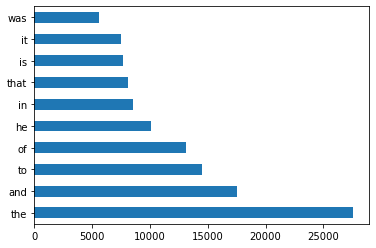

In [18]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');


In [20]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)


In [21]:
#Getting the baseline accuracy for my model
y_test.value_counts(normalize=True)

lotr           0.5
harrypotter    0.5
Name: subreddit, dtype: float64

In [40]:
pipe = Pipeline([
    ('vect', CountVectorizer(binary = True, max_features = None)),
    ('model', LogisticRegression())
])


In [41]:
#How will my model perform on unseen data?
cross_val_score(pipe, X_train, y_train, cv=3).mean() 


0.9659999999999999

In [42]:
#From lecture on 2.25
param_grid = {
    'vect__binary': [True, False],
    'vect__max_features': [None, 4000, 5000]
}
gs = GridSearchCV(pipe, param_grid=param_grid)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.966


{'vect__binary': True, 'vect__max_features': None}

/Users/breezehomefolder/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


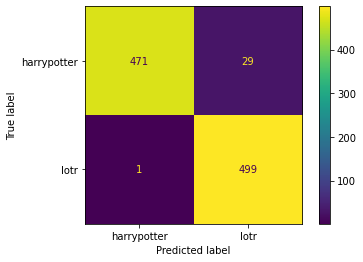

In [47]:
plot_confusion_matrix(gs, X_test, y_test);

Actual No Predicted No (TN) = 471
Actual No Predicted Yes (FP) = 29
Actual Yes Predicted No (FN) = 1
Actual Yes Predicted Yes (TP) = 499

Now we will see how well the model will perform without the character names in them! 